<a href="https://colab.research.google.com/github/Ahmedkhattab97/Health-care-analysis/blob/main/Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Health_care.csv'
health_care = pd.read_csv(path)

In [ ]:
health_care.head()

,Patient ID,Gender,Disease,Treatment,Hospital,Admission Date,Discharge Date,Treatment Status,Cause of Death,Date of Birth
0,PAT-00001,Male,Tuberculosis,Dialysis,City General Hospital,2022-12-19,2023-01-16,Recovered,NaN,1973-06-05
1,PAT-00002,Female,Malaria,Dialysis,City General Hospital,2023-03-29,2023-04-21,Recovered,NaN,1998-11-21
2,PAT-00003,Female,Malaria,Surgery,City General Hospital,2022-09-16,2022-10-15,Recovered,NaN,1942-02-14
3,PAT-00004,Male,Asthma,Dialysis,City General Hospital,2022-02-07,2022-02-11,Recovered,NaN,1943-01-17
4,PAT-00005,Female,Diabetes,Physical Therapy,City General Hospital,2022-10-25,2022-10-30,Recovered,NaN,1979-07-28


In [ ]:
health_care.describe()

,Patient ID,Gender,Disease,Treatment,Hospital,Admission Date,Discharge Date,Treatment Status,Cause of Death,Date of Birth
count,8000,8000,8000,8000,8000,8000,8000,8000,419,8000
unique,8000,2,15,7,7,762,787,3,4,7130
top,PAT-07984,Male,Malaria,Dialysis,Lifeline Hospital,2023-07-26,2023-03-24,Recovered,Multiple Organ Failure,1928-09-28
freq,1,5206,1193,2498,2400,21,24,6819,114,4


# 1-Whate are the number of total patients?


In [ ]:
total_patients= health_care.shape[0]
print('Total patients are ', total_patients, 'Patient')

Total patients are  8000 Patient


# 2-Distribution of diseases by gender

In [ ]:
gender_count = health_care['Gender'].value_counts()
print('Gender Distribution')
print(gender_count)

Gender Distribution
Gender
Male      5206
Female    2794
Name: count, dtype: int64


In [ ]:
health_care['Gender'].value_counts()

,count
Gender,
Male,5206
Female,2794


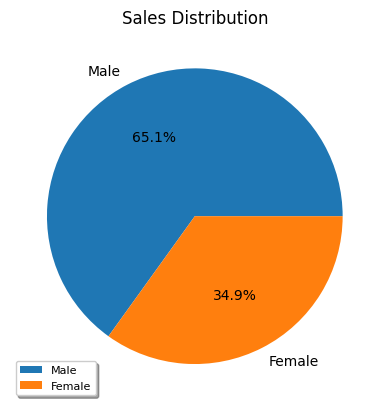

In [ ]:
# Visualize the data
gg= health_care['Gender'].value_counts()
plt.pie(gg, labels = gg.index, autopct='%1.1f%%')
plt.legend(loc='lower left', shadow=True, fontsize=8)
plt.title('Sales Distribution')
plt.show()

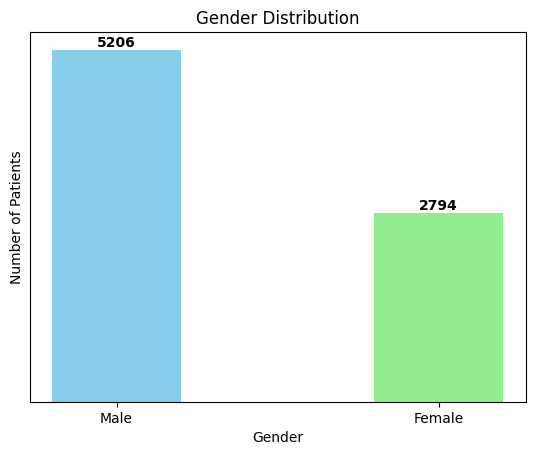

In [ ]:
# Visualize the distribution of Gender

gender_count = health_care['Gender'].value_counts()

plt.bar(gender_count.index, gender_count.values, width=0.4, color=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')

# 🔕 Hide the y-axis completely (ticks and labels)
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# ✨ Add value labels above each bar

for i, value in enumerate(gender_count.values):
    plt.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


#3-Patient Age-Group by total visit

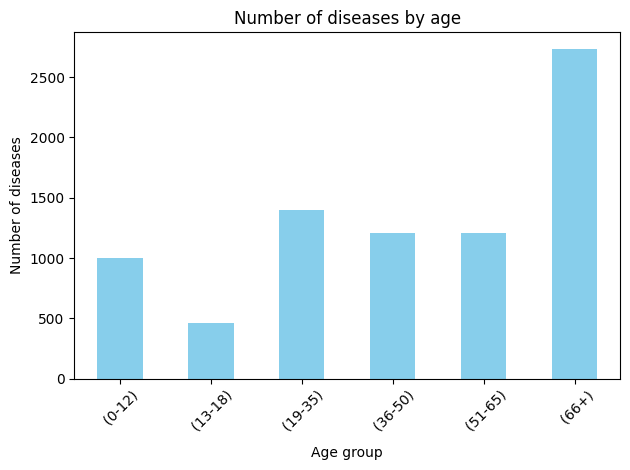

In [ ]:
# --- Convert columns to datetime format ---

health_care['Date of Birth'] = pd.to_datetime(health_care['Date of Birth'])
health_care['Admission Date'] = pd.to_datetime(health_care['Admission Date'])

# --- Calculate age at the time of admission ---
health_care['age_at_admission'] = health_care['Admission Date'].dt.year - health_care['Date of Birth'].dt.year
health_care['age_at_admission'] -= (
    (health_care['Admission Date'].dt.month < health_care['Date of Birth'].dt.month) |
    ((health_care['Admission Date'].dt.month == health_care['Date of Birth'].dt.month) &
     (health_care['Admission Date'].dt.day < health_care['Date of Birth'].dt.day))
).astype(int)

# --- تقسيم الأعمار إلى فئات ---
bins = [0, 12, 18, 35, 50, 65, 100]
labels = [' (0-12)', ' (13-18)', ' (19-35)', ' (36-50)', '  (51-65)', '  (66+)']

health_care['age_group'] = pd.cut(health_care['age_at_admission'], bins=bins, labels=labels, right=True, include_lowest=True)

# --- عرض النتائج ---
#print("بيانات المرضى مع العمر والفئة العمرية:")
#print(health_care[['Date of Birth', 'Admission Date', 'age_at_admission', 'age_group']])

# --- تحليل عدد الحالات حسب الفئات العمرية ---
#print("\nعدد الحالات في كل فئة عمرية:")
#print(health_care['age_group'].value_counts().sort_index())

# --- رسم بياني للفئات العمرية ---
health_care['age_group'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of diseases by age')
plt.xlabel('Age group')
plt.ylabel('Number of diseases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#4- Most common diseases diagnosed among the patients

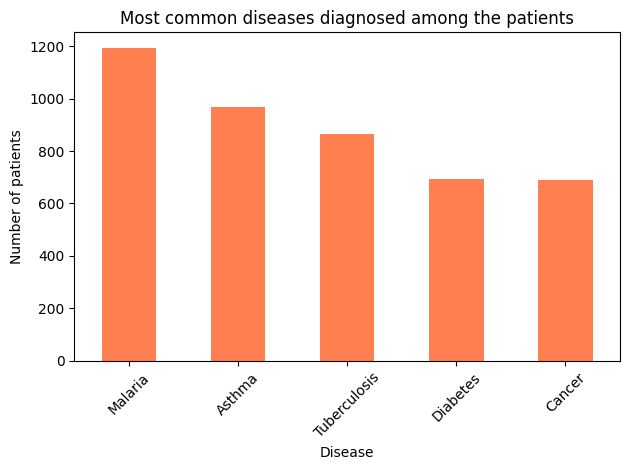

In [ ]:
# Visualize the data using a bar chart
diseases_count = health_care['Disease'].value_counts().nlargest(5)
ax = diseases_count.plot(kind='bar', color='coral')
plt.title('Most common diseases diagnosed among the patients')
plt.xlabel('Disease')
plt.ylabel('Number of patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
top3 = health_care['Disease'].value_counts().nlargest(3)
top3

,count
Disease,
Malaria,1193
Asthma,966
Tuberculosis,864


In [ ]:
top4 = health_care['Disease'].value_counts().nlargest(4)

total_number = health_care['Disease'].value_counts().sum()

top3_percentage = ((top4 / total_number) * 100).round(1)

for disease, percentage in top3_percentage.items():
    print(f"{disease}: {percentage}%")

Malaria: 14.9%
Asthma: 12.1%
Tuberculosis: 10.8%
Diabetes: 8.7%


#5-Are certain diseases more prevalent in one gender cmpared to the other ?

In [ ]:
#gender_disease = pd.crosstab(health_care['Disease'], health_care['Gender'], normalize='index') * 100
gender_disease = pd.crosstab(health_care['Disease'], health_care['Gender']).style.background_gradient(cmap='Reds')

gender_disease

Gender,Female,Male
Disease,,
Asthma,320,646
COVID-19,53,104
Cancer,239,452
Dengue,27,42
Diabetes,256,438
HIV/AIDS,155,333
Heart Disease,206,361
Hypertension,65,108
Kidney Failure,182,293


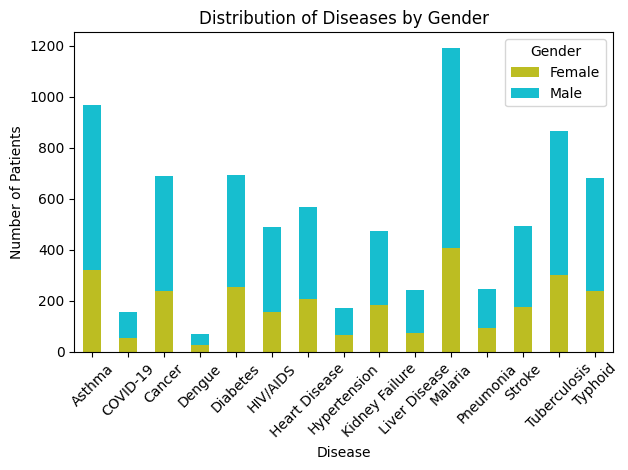

In [ ]:
gender_disease = pd.crosstab(health_care['Disease'], health_care['Gender'])

# رسم المخطط
gender_disease.plot(kind='bar', stacked=True, color=['#bcbd22', '#17becf'])

plt.title("Distribution of Diseases by Gender")
plt.xlabel("Disease")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#6- duration of each patient stay - number of patients in each group

In [ ]:
health_care['Admission Date'] = pd.to_datetime(health_care['Admission Date'])
health_care['Discharge Date'] = pd.to_datetime(health_care['Discharge Date'])
health_care['Stay_days'] = health_care['Discharge Date'] - health_care['Admission Date']
health_care['Stay_days'] = health_care['Stay_days'].dt.days
print(health_care[['Admission Date', 'Discharge Date', 'Stay_days']])


     Admission Date Discharge Date  Stay_days
0        2022-12-19     2023-01-16         28
1        2023-03-29     2023-04-21         23
2        2022-09-16     2022-10-15         29
3        2022-02-07     2022-02-11          4
4        2022-10-25     2022-10-30          5
...             ...            ...        ...
7995     2022-06-28     2022-07-05          7
7996     2022-01-28     2022-02-25         28
7997     2022-09-14     2022-09-22          8
7998     2023-08-04     2023-08-25         21
7999     2023-09-09     2023-10-06         27

[8000 rows x 3 columns]


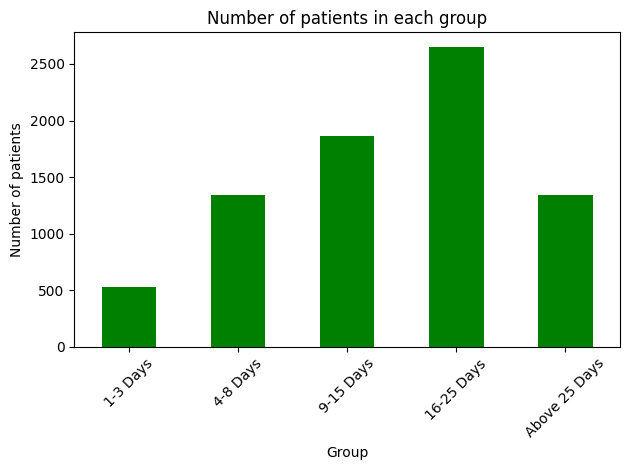

In [ ]:
bins= [1,3,8,15,25, float('inf')]
labels= ['1-3 Days', '4-8 Days', '9-15 Days', '16-25 Days', 'Above 25 Days']
#labels=['Short stay', 'Moderate stay', 'Long stay', 'Extended stay']

health_care['stay_grouped'] = pd.cut(health_care['Stay_days'], bins= bins, labels = labels, right= True)

# Visualize the data using a bar chart
health_care['stay_grouped'].value_counts().sort_index().plot(kind='bar', color='Green')
plt.title('Number of patients in each group')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#7- Analyse pattern to identify risk factor

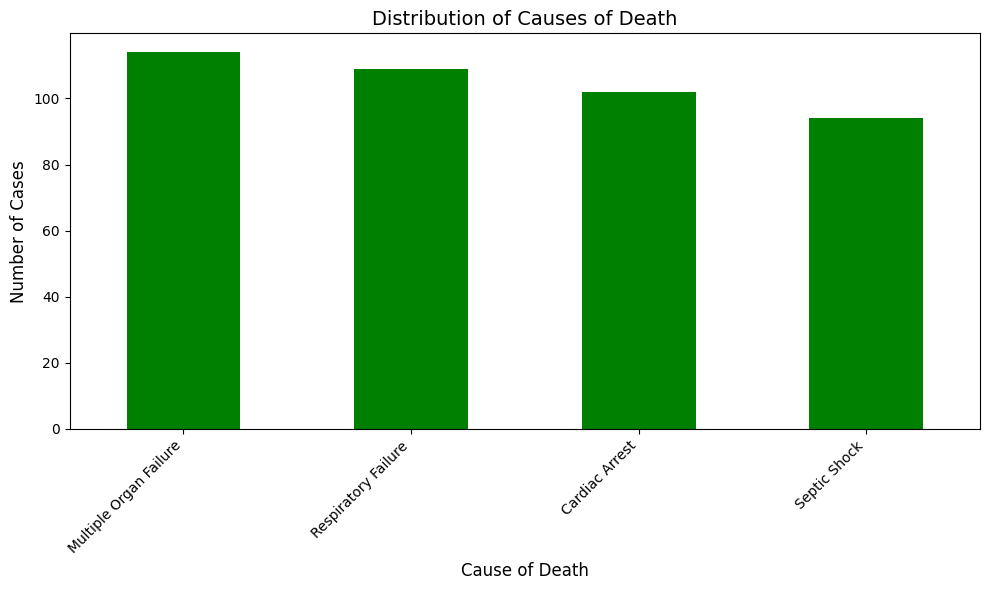

In [ ]:

# Cleaning Data
cleaned_death = health_care['Cause of Death'].dropna().value_counts()

ax = cleaned_death.plot(kind='bar', color='green', figsize=(10, 6))

plt.title('Distribution of Causes of Death', fontsize=14)
plt.xlabel('Cause of Death', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


#percient of Treatment Status

In [ ]:
total_patients = health_care['Treatment Status'].shape[0]
total_patients

8000

In [ ]:
recoverd_patients = (health_care['Treatment Status'].str.lower() == 'recovered').sum()
recoverd_patients

np.int64(6819)

In [ ]:
recoverd_percentage = (recoverd_patients / total_patients) * 100
recoverd_percentage

np.float64(85.2375)

In [ ]:
Under_treatment_patients = (health_care['Treatment Status'].str.lower() == 'under treatment').sum()
Under_treatment_patients

np.int64(762)

In [ ]:
Under_treatment_percentage = (Under_treatment_patients / total_patients) * 100
Under_treatment_percentage

np.float64(9.525)

In [ ]:
deceased_patients = (health_care['Treatment Status'].str.lower() == 'deceased').sum()
deceased_patients

np.int64(419)

In [ ]:
deceased_percentage = (deceased_patients / total_patients) * 100
deceased_percentage

np.float64(5.2375)

In [ ]:
print(f'Total patients:', total_patients)
print(f'% of Recoverd patients:', recoverd_percentage)
print(f'% of Under Treatment patients:', Under_treatment_percentage)
print(f'% of Deceased patients:', deceased_percentage)

Total patients: 8000
% of Recoverd patients: 85.2375
% of Under Treatment patients: 9.525
% of Deceased patients: 5.2375


#show this as Donut Chart

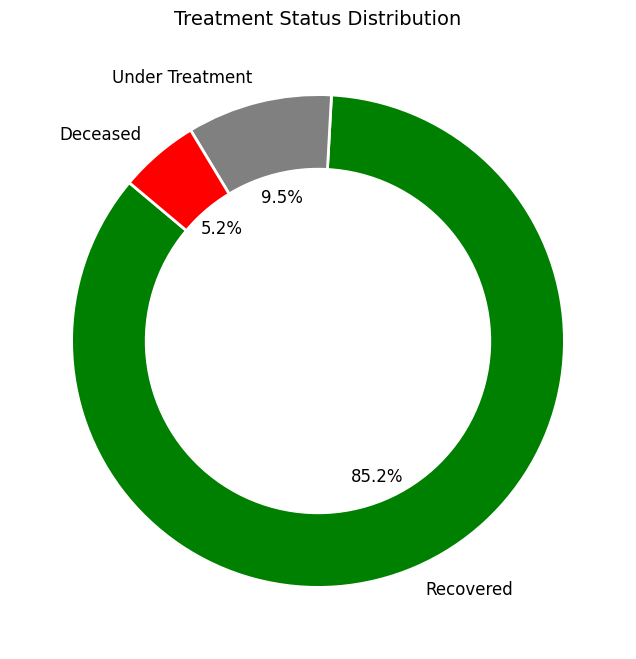

In [ ]:
sizes = [recoverd_percentage, Under_treatment_percentage, deceased_percentage]
labels = ['Recovered', 'Under Treatment', 'Deceased']
colors = ['green', 'gray', 'red']

plt.figure(figsize=(8, 8))

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle = 140,
        textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white', 'linewidth': 2} )
plt.gca().add_artist(plt. Circle((0, 0), 0.70, color='white'))
plt.title('Treatment Status Distribution', fontsize=14)
plt.show()

#What are the peak days of the week on a monthly bases for admission and discharge?

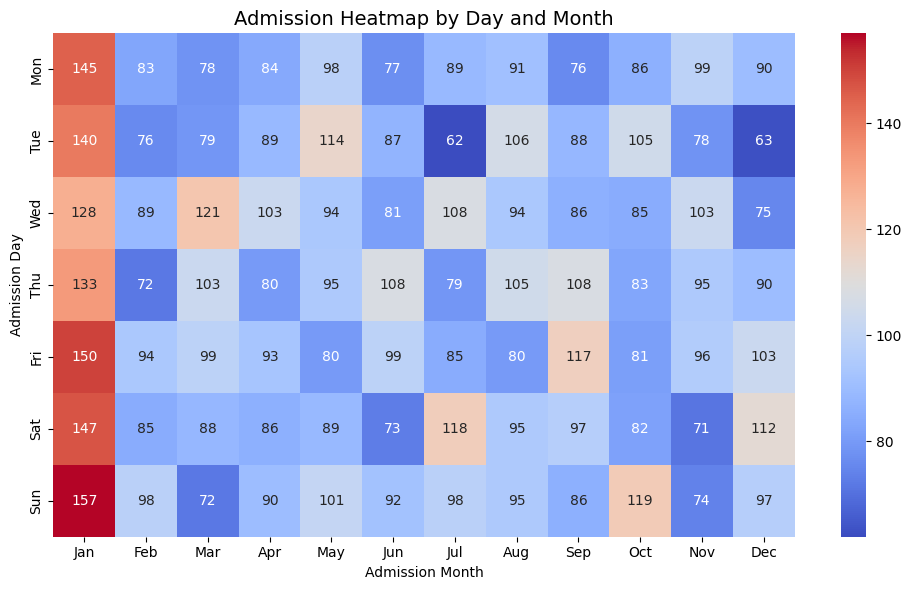

In [ ]:
health_care['Admission Date'] = pd.to_datetime(health_care['Admission Date'], errors = "coerce")

health_care['Admission Month'] = health_care['Admission Date'].dt.strftime('%b')
health_care['Admission Day'] = health_care['Admission Date'].dt.strftime('%a')

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun' ]

admission_heatmap = health_care.pivot_table(
    index='Admission Day',
    columns='Admission Month',
    aggfunc='size',
    fill_value = 0
)
admission_heatmap_sorted = admission_heatmap.reindex(index = day_order, columns = month_order)

plt.figure(figsize=(10, 6))
sns.heatmap(admission_heatmap_sorted, annot = True, fmt="d", cmap="coolwarm")
plt.title('Admission Heatmap by Day and Month', fontsize=14)
plt.tight_layout()
plt.show()




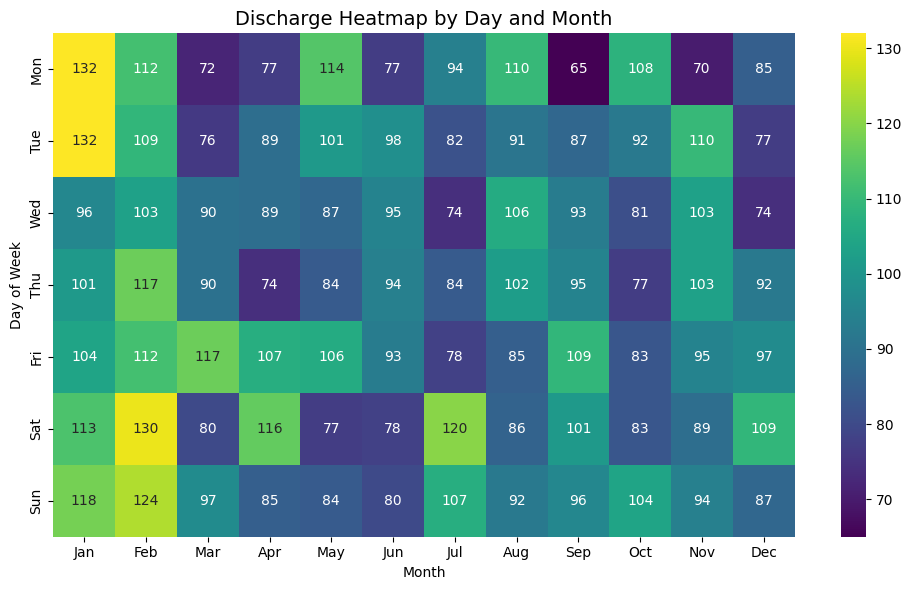

In [ ]:
# تأكد من تحويل التاريخ
health_care['Discharge Date'] = pd.to_datetime(health_care['Discharge Date'], errors='coerce')

# Extract month and day
health_care['Discharge Month'] = health_care['Discharge Date'].dt.strftime('%b')
health_care['Discharge Day'] = health_care['Discharge Date'].dt.strftime('%a')

# Sort months and days
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Create Pivot Table
discharge_heatmap = health_care.pivot_table(
    index='Discharge Day',
    columns='Discharge Month',
    aggfunc='size',
    fill_value=0
)

# إعادة ترتيب الأيام والشهور
discharge_heatmap_sorted = discharge_heatmap.reindex(index=day_order, columns=month_order)

# Visualize the data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(discharge_heatmap_sorted, annot=True, fmt="d", cmap="viridis")
plt.title('Discharge Heatmap by Day and Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


#What is the total number of patients admitted per week, month, year

In [ ]:
health_care['Admission Day'] = health_care['Admission Date'].dt.strftime('%a')
admission_by_day = health_care.groupby('Admission Day').size()

day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
admission_by_day = admission_by_day.reindex(day_order)



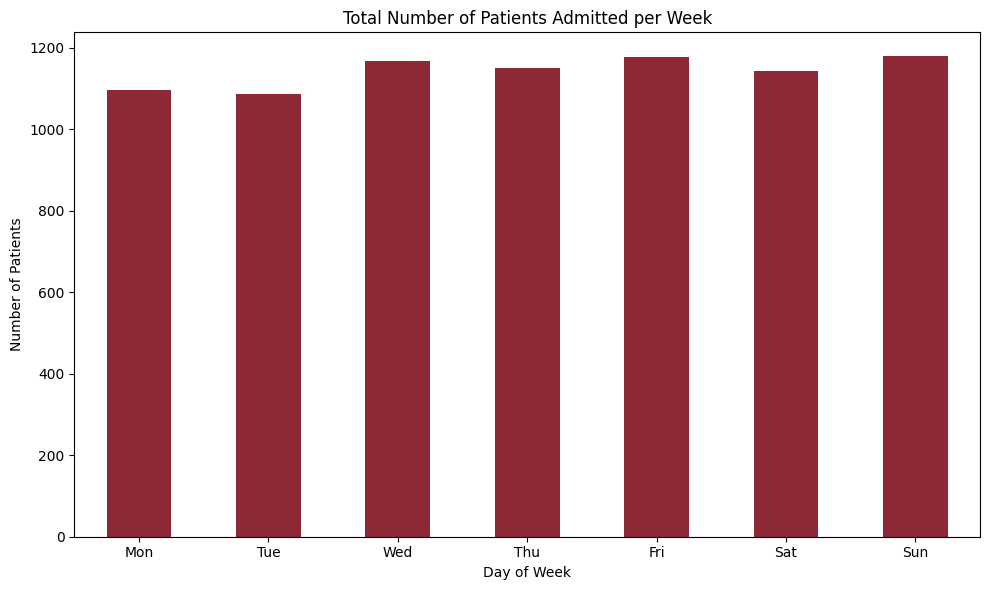

In [ ]:
plt.figure(figsize=(10, 6))
admission_by_day.plot(kind='bar', color='#8D2837')
plt.title('Total Number of Patients Admitted per Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Patients')
plt.xticks(rotation= 0)
plt.tight_layout()
plt.show()

In [ ]:
top3_admission_day = admission_by_day.nlargest(3)
top3_admission_day

,0
Admission Day,
Sun,1179
Fri,1177
Wed,1167


#Total admission by month filtered by year

In [ ]:
selected_year = 2023
health_care['Admission Date'] = pd.to_datetime(health_care['Admission Date'], errors='coerce')

# Filter the dataset for the selected year
health_care_year = health_care[health_care['Admission Date'].dt.year == selected_year].copy()

# Extract month as a number and month name
health_care_year['Admission Month'] = health_care_year['Admission Date'].dt.month
health_care_year['Month Name'] = health_care_year['Admission Date'].dt.strftime('%b')

# Aggregate the data by month
admission_by_month = (health_care_year.groupby(['Admission Month', 'Month Name'])
                      .size()
                      .reset_index(name='Total Patients')
                      .sort_values('Admission Month'))

admission_by_month


,Admission Month,Month Name,Total Patients
0,1,Jan,318
1,2,Feb,293
2,3,Mar,327
3,4,Apr,298
4,5,May,322
5,6,Jun,302
6,7,Jul,312
7,8,Aug,337
8,9,Sep,347
9,10,Oct,330


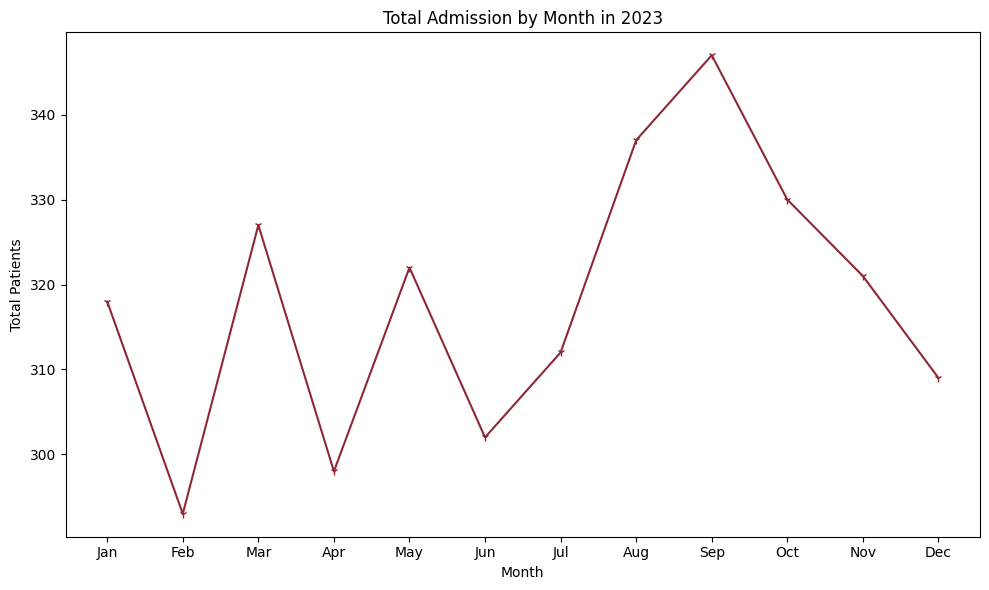

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(admission_by_month['Month Name'], admission_by_month['Total Patients'], marker='1', linestyle='-', color='#8D2837')
plt.title(f'Total Admission by Month in {selected_year}')
plt.xlabel('Month')
plt.ylabel('Total Patients')
plt.tight_layout()
plt.show()